In [15]:
from PIL import Image
import zipfile

In [8]:
f=zipfile.ZipFile('./black.zip','r')
for file in f.namelist():
    f.extract(file,"./black") #解压到的位置，./表示当前目录(与此.ipynb文件同一个目录)
f.close()

In [14]:
import os
import cv2

In [3]:
def read_directory(directory_name):
    array_of_img=[]
    for filename in os.listdir(r"./"+directory_name):
        img = cv2.imread(directory_name + "/" + filename,3)
        array_of_img.append(img)
    return array_of_img

In [4]:
all_pic=read_directory('./black12')

In [9]:
from matplotlib import pyplot as plt

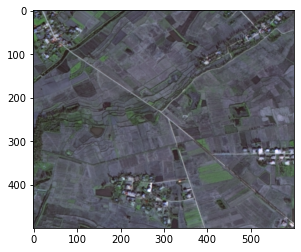

In [32]:
plt.imshow(all_pic[1])

In [14]:
all_pic[16].shape

(500, 600, 3)

In [15]:
# Sobel边缘检测算子
for i in range(len(all_pic)):
    img = all_pic[i]
    x = cv2.Sobel(img, cv2.CV_16S, 1, 0)
    y = cv2.Sobel(img, cv2.CV_16S, 0, 1)
    # cv2.convertScaleAbs(src[, dst[, alpha[, beta]]])
    # 可选参数alpha是伸缩系数，beta是加到结果上的一个值，结果返回uint类型的图像
    #Scale_absX = cv2.convertScaleAbs(x)  # convert 转换  scale 缩放
    Scale_absY = cv2.convertScaleAbs(y)
    #result = cv2.addWeighted(Scale_absX, 0.5, Scale_absY, 0.5, 0)
    #cv2.imshow('img', img)
    #cv2.imshow('Scale_absX', Scale_absX)
    cv2.imshow('Scale_absY', Scale_absY)
    #cv2.imshow('result', result)
    cv2.waitKey(0)
    cv2.imwrite('C:\\Users\\zhou\\Desktop\\final22\\1%s.png'%(i), Scale_absY)
    cv2.destroyAllWindows()

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-9d_dfo3_\opencv\modules\imgproc\src\deriv.cpp:419: error: (-215:Assertion failed) !_src.empty() in function 'cv::Sobel'


In [16]:
pwd

'C:\\Users\\zhou\\Documents\\Mathor Cup'

In [17]:
img =cv2.imread('./Test1.tif')
x = cv2.Sobel(img, cv2.CV_16S, 1, 0)
y = cv2.Sobel(img, cv2.CV_16S, 0, 1)
# cv2.convertScaleAbs(src[, dst[, alpha[, beta]]])
# 可选参数alpha是伸缩系数，beta是加到结果上的一个值，结果返回uint类型的图像
#Scale_absX = cv2.convertScaleAbs(x)  # convert 转换  scale 缩放
Scale_absY = cv2.convertScaleAbs(y)
#result = cv2.addWeighted(Scale_absX, 0.5, Scale_absY, 0.5, 0)
#cv2.imshow('img', img)
#cv2.imshow('Scale_absX', Scale_absX)
cv2.imshow('Scale_absY', Scale_absY)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
img=cv2.imread('./0.png')

In [6]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [7]:
# 均值滤波
# 用3*3的核对图片进行卷积操作，核上的参数都是1/9，达到均值的效果
blur = cv2.blur(img, (3, 3))
# 方框滤波（归一化）=均值滤波
box1 = cv2.boxFilter(img, -1, (3, 3), normalize=True)
# 方框滤波（不归一化）
box2 = cv2.boxFilter(img, -1, (3, 3), normalize=False)
# 高斯滤波
# 用5*5的核进行卷积操作，但核上离中心像素近的参数大。
guassian = cv2.GaussianBlur(img, (5, 5), 2)
# 中值滤波
# 将某像素点周围5*5的像素点提取出来，排序，取中值写入此像素点。
mean = cv2.medianBlur(img, 5)

# 展示效果
titles = ['Original figure', 'blur', 'box_norm', 'box_no_norm', 'guassian', 'mean']
images = [img, blur, box1, box2, guassian, mean]


In [8]:
guassian = cv2.GaussianBlur(img, (9,9), 15)
cv2.imshow('guassian',guassian)
cv2.waitKey(0)
#cv2.imwrite('C:\\Users\\zhou\\Desktop\\05.png',mean)
cv2.destroyAllWindows()

In [22]:
blur = cv2.blur(img, (3, 3))

In [23]:
#box1 = cv2.boxFilter(blur, -1, (3, 3), normalize=True)

In [24]:
guassian = cv2.GaussianBlur(blur, (3, 3), 1.5)

In [25]:
mean = cv2.medianBlur(guassian, 5)

In [26]:
cv2.imshow('box1',guassian)
cv2.waitKey(0)
#cv2.imwrite('C:\\Users\\zhou\\Desktop\\05.png',mean)
cv2.destroyAllWindows()

In [27]:
guassian = cv2.GaussianBlur(img, (5,5), 1.5)
cv2.imshow('guassian',guassian)
cv2.waitKey(0)
#cv2.imwrite('C:\\Users\\zhou\\Desktop\\05.png',mean)
cv2.destroyAllWindows()

In [28]:
import cv2
import numpy as np
#加载图像
image = guassian
#自定义卷积核
kernel_sharpen_1 = np.array([
        [-1,-1,-1],
        [-1,9,-1],
        [-1,-1,-1]])
kernel_sharpen_2 = np.array([
        [1.1,1.1,1.1],
        [1.1,-7.8,1.1],
        [1.1,1.1,1.1]])
kernel_sharpen_3 = np.array([
        [-1,-1,-1,-1,-1],
        [-1,2,2,2,-1],
        [-1,2,8,2,-1],
        [-1,2,2,2,-1],
        [-1,-1,-1,-1,-1]])/8.0
#卷积
output_1 = cv2.filter2D(image,-1,kernel_sharpen_1)
output_2 = cv2.filter2D(image,-1,kernel_sharpen_2)
output_3 = cv2.filter2D(image,-1,kernel_sharpen_3)
#显示锐化效果
cv2.imshow('Original Image',image)
#cv2.imshow('sharpen_1 Image',output_1)
cv2.imshow('sharpen_2 Image',output_2)
#cv2.imshow('sharpen_3 Image',output_3)
#停顿
if cv2.waitKey(0) & 0xFF == 27:
    cv2.destroyAllWindows()

In [29]:
output_22 = cv2.filter2D(output_2,-1,kernel_sharpen_2)
cv2.imshow('sharpen_2 Image',output_22)
if cv2.waitKey(0) & 0xFF == 27:
    cv2.destroyAllWindows()

In [30]:
guassian = cv2.GaussianBlur(output_22, (9,9), 15)
cv2.imshow('guassian',guassian)
cv2.waitKey(0)
#cv2.imwrite('',mean)
cv2.destroyAllWindows()

In [31]:
output_23 = cv2.filter2D(guassian,-1,kernel_sharpen_2)
cv2.imshow('sharpen_2 Image',output_23)
if cv2.waitKey(0) & 0xFF == 27:
    cv2.destroyAllWindows()

In [7]:
import PIL
from PIL import Image
import numpy as np

In [17]:
im=Image.open('C:\\Users\\zhou\\Desktop\\Test11.tif')

In [19]:
im2=np.array(im)/255

In [20]:
cv2.imwrite('C:\\Users\\zhou\\Desktop\\Test111.png',im2)

True

In [4]:
import glob
from PIL import Image
for i in glob.glob(r'./visualize_Test2.png'):
    im = Image.open(i,"r")
    print(i.split(".")[0])
    im.save("2.tif".format(i.split(".")[0]),quality=95)